# Expedia Unsupervised Learning
-[Rishit Dagli](rishitdagli.ml)

## About Me

[Twitter](https://twitter.com/rishit_dagli)
[GitHub](https://github.com/Rishit-dagli)
[Medium](https://medium.com/@rishit.dagli)

If you find the notebook useful and/or learn something from it please upvote it, the complet repository for 10 Days of ML is available here - 

https://github.com/Rishit-dagli/10-Days-of-ML

Please Star to show your support

This Notebook is also a part of the 10 Days Of ML Challenge by TFUG Mumbai

## Knowing about the dataset

“Hotel” refers to hotels, apartments, B&Bs, hostels and other properties appearing on Expedia’s websites.  Room types are not distinguished and the data can be assumed to apply to the least expensive room type.

Most of the data are for searches that resulted in a purchase, but a small proportion are for searches not leading to a purchase.

More info can be found [here](https://www.kaggle.com/c/expedia-personalized-sort/data)

## Some imports

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
import sklearn
from zipfile import ZipFile

## Unzip files

There are many libraries you can use for the same but we would prefer the simple command line utility `unzip`. Please note that I am not unzipping the train and test files together as Kaggle runs out of memory during the process. You are requested to not try that on Kaggle.

In [3]:
!unzip /kaggle/input/expedia-personalized-sort/data.zip

Archive:  /kaggle/input/expedia-personalized-sort/data.zip
  inflating: test.csv                
  inflating: train.csv               


## Load the data

Thsi step can take quite some time due to huge size of the data

In [4]:
train = pd.read_csv('train.csv')

View first 10 rows of the data to get an idea about it

In [5]:
train.head(10)

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
5,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,30184,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0,NaN,0
6,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,44147,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
7,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,50984,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
8,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,53341,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,6.0,0,NaN,0
9,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,56880,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


## Data preprocessing

The amount of null values in dataset

In [6]:
train.isnull()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
1,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
2,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
3,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,False,False,True,False
4,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917525,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
9917526,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,False,False
9917527,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False
9917528,False,False,False,False,True,True,False,False,False,False,...,True,True,True,True,True,True,True,False,True,False


Taking notr of the above output

```
srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        9412233
visitor_hist_adr_usd           9409918
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                14630
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           2178380
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      9281966
orig_destination_distance      3216461
random_bool                          0
comp1_rate                     9681724
comp1_inv                      9663097
comp1_rate_percent_diff        9732623
comp2_rate                     5876897
comp2_inv                      5665992
comp2_rate_percent_diff        8807683
comp3_rate                     6858257
comp3_inv                      6625309
comp3_rate_percent_diff        8973523
comp4_rate                     9297431
comp4_inv                      9225059
comp4_rate_percent_diff        9653317
comp5_rate                     5473236
comp5_inv                      5196697
comp5_rate_percent_diff        8236524
comp6_rate                     9435043
comp6_inv                      9393385
comp6_rate_percent_diff        9724218
comp7_rate                     9286453
comp7_inv                      9204355
comp7_rate_percent_diff        9639692
comp8_rate                     6098487
comp8_inv                      5957142
comp8_rate_percent_diff        8691823
click_bool                           0
gross_bookings_usd             9640938
booking_bool                         0
dtype: int64
```

We see that majority of values in some columns are null, to prevent us from making some very bad models it is safe to remove them. Also note that imputation i not preferred here and is an wasted effort as we have very few values

You can use this code to create a sample visualization however I have commented it out as Kaggle exhausts its resources in doing so. You can try this out in your local machine or cloud

In [7]:
'''
df.plot(x='date_time', y = 'price_usd', figsize = (20,5))
plt.xlabel('Date time')
plt.ylabel('Price in USD')
plt.title('Time Series of room price by date time of search')
'''

"\ndf.plot(x='date_time', y = 'price_usd', figsize = (20,5))\nplt.xlabel('Date time')\nplt.ylabel('Price in USD')\nplt.title('Time Series of room price by date time of search')\n"

I have performed PCA and got that these 3 columns have the maximum weightage on the data and the other data sources have very low or no effect on the data.

To create a good model, lets take these data columns

In [8]:
df = train.loc[train['prop_id'] == 104517]

df = df.loc[df['visitor_location_country_id'] == 219]

df = df.loc[df['srch_room_count'] == 1]

df = df[['date_time', 'price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]

Few statistics of the dataset

In [9]:
df.describe()

,price_usd,srch_booking_window,srch_saturday_night_bool
count,3049.000000,3049.000000,3049.000000
mean,112.939023,37.082650,0.524434
std,113.374049,46.160272,0.499485
min,0.120000,0.000000,0.000000
25%,67.000000,6.000000,0.000000
50%,100.000000,20.000000,1.000000
75%,141.000000,48.000000,1.000000
max,5584.000000,292.000000,1.000000


We see majority of values in `price_usd` are `< 5584` categorical benchmark so what you can now do is see your stats for data below this

In [10]:
df = df.loc[df['price_usd'] < 5584]
df['price_usd'].describe()

count    3048.000000
mean      111.144055
std        55.055161
min         0.120000
25%        67.000000
50%       100.000000
75%       141.000000
max       536.000000
Name: price_usd, dtype: float64

Earlier this might have seemed as a time series problem to you, but given that you need to perform unsupervised learning, we will convert timestamps to numerical entities to help us and thus provide a good inference

This is the range of time we nned to use

In [11]:
print(df['date_time'].min())
print(df['date_time'].max())

2012-11-01 02:48:30
2013-06-30 22:50:21


As, we will now be working on the `date_time` column letss see a few stats which might enable us to choose best conversion types

In [12]:
df['date_time'].describe()

df['date_time'] = pd.to_datetime(df['date_time'])

df.head()

,date_time,price_usd,srch_booking_window,srch_saturday_night_bool
2041,2013-03-14 11:27:28,206.0,99,1
3152,2013-01-03 20:48:24,186.0,6,0
5166,2013-01-19 16:51:27,61.0,1,0
10135,2013-01-26 11:34:23,72.0,116,0
10560,2013-04-29 09:39:50,246.0,245,0


As in time series and sequences, we create a plot of this. How this helps?

Well you can atleast  eye out the trend and/or seasonality in your dataset and these are the indispensable tools on which Time Series stands. So, this is very useful

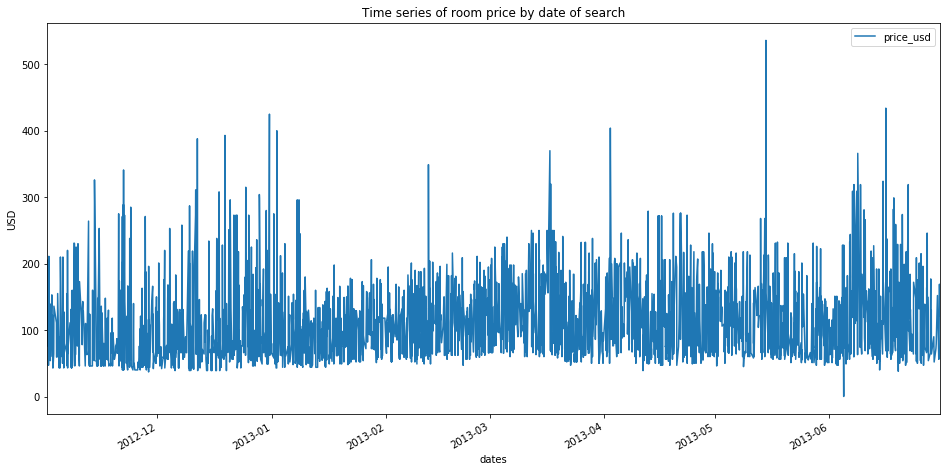

In [13]:
df.plot(x = 'date_time', 
        y = 'price_usd', 
        figsize = (16, 8))

plt.xlabel('dates')
plt.ylabel('USD')
plt.title('Time series of room price by date of search');

This is some pretty crazy amount of noise. But can you see one thing?

Not yet, spend some time looking at it

I can now eye out that my dataset probably has some autocorelation features, I see same trends, repeating at a different slope at the start of the plot, it goes on to become bad at the end, but now I have some hope that I can figure out things

We just created a plot for time vs USD what next?

Let's create a plot for 'srch_saturday_night_bool' and the prices, This could maybe help us. We will create a bar graph

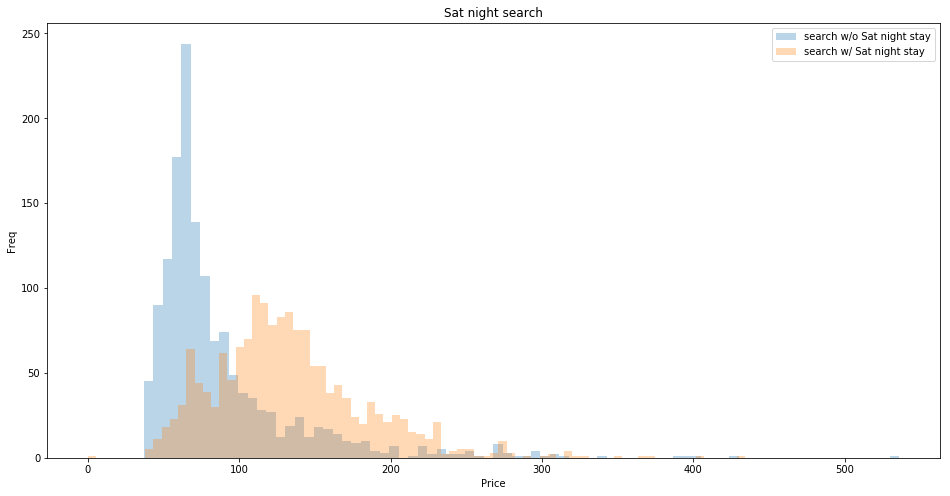

In [14]:
a = df.loc[df['srch_saturday_night_bool'] == 0, 'price_usd']
b = df.loc[df['srch_saturday_night_bool'] == 1, 'price_usd']

plt.figure(figsize = (16, 8))

plt.hist(a, bins = 80, 
         alpha = 0.3, 
         label = 'search w/o Sat night stay')

plt.hist(b, bins = 80, 
         alpha = 0.3, 
         label = 'search w/ Sat night stay')

plt.xlabel('Price')
plt.ylabel('Freq')
plt.legend()
plt.title('Sat night search')
plt.plot();



There seems to be some strong relation between Price and Saturay Night Search that's good, I knew that from PCAA, but now I can see that out clearly by the peak

And now similarly for booking_window

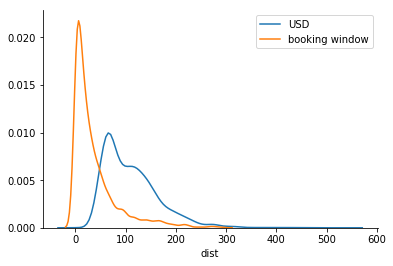

In [15]:
sns.distplot(df['price_usd'], 
                 hist = False, label = 'USD')

sns.distplot(df['srch_booking_window'], 
                  hist = False, label = 'booking window')

plt.xlabel('dist')
sns.despine()

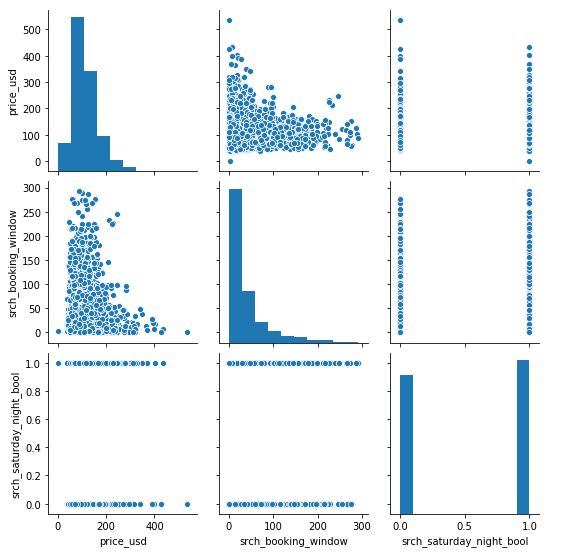

In [16]:
sns.pairplot(df)

## Converting the times

My model understands number and I have a date this is not going to work so I need to create a new column called date_time integer version or for short date_time_int, here we will be having numeric conversion of the date_time column

In [17]:
df = df.sort_values('date_time')
df['date_time_int'] = df.date_time.astype(np.int64)

A Kernel density estimation would be helpful

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


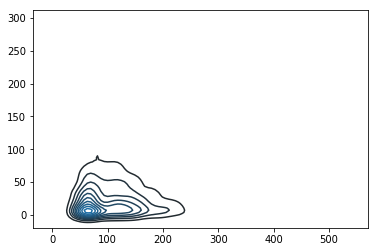

In [18]:
sns.kdeplot(df[["price_usd", "srch_booking_window", "srch_saturday_night_bool"]])

## Models and Algorithms

Now we come to the part of applying models and algorithms, I don't know which model to use. So, what will we do?

### **Experiment!!!**

### K-Means

Let's start with the simplest and most common one. We will be using sklearn to simplify things. 

Spoiler alert: I shifted K-means up because at the end I saw K-Means was promising 😀 😀 

Let's try experimenting with hyperparameters

In [19]:
from sklearn.cluster import KMeans
data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
n_cluster = range(1, 20)

kmeans = [KMeans(n_clusters = i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

I trained it for 1 to 19 clusters, let see the scores we receive and choose right amount of clusters, Lets see a neat looking plot of the same

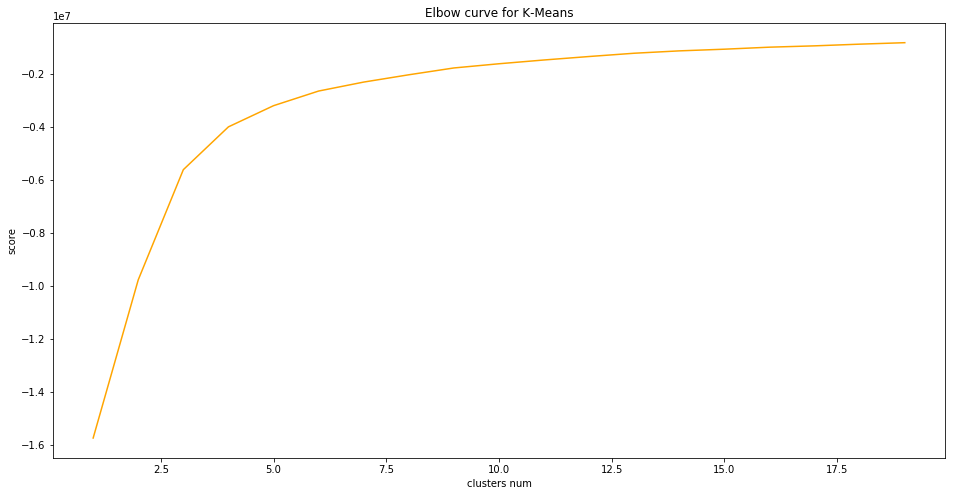

In [20]:
fig, ax = plt.subplots(figsize = (16, 8))
ax.plot(n_cluster, scores, color = 'orange')

plt.xlabel('clusters num')
plt.ylabel('score')
plt.title('Elbow curve for K-Means')
plt.show();

We come to a saturation at almost 16-17 clusters with a **wonderful score of -0.2**

Please do not get intimidated by negative sign, it shows us the distance which means you consider it as $|-0.2 | = 0.2$

This is a huge dataset lets free up some resources which we do not need any longer, also includes huge variables

In [21]:
del train

This is an importnat step as we are now going to load the test set which requires a good amount of resources

In [22]:
import os
os.remove('train.csv')

In [23]:
test = pd.read_csv('test.csv')

In [24]:
del kmeans

Lets fit the mmodel with the decided number of clusters

In [25]:
km = KMeans(n_clusters = 17).fit(data)

**Thinngs are getting exciting!!** We will now

In [26]:
X = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
X = X.reset_index(drop = True)

km.predict(X)

array([14, 14,  6, ...,  2, 16,  5], dtype=int32)

I didn't know about `mpl_toolkits` first, I googled it out. By, this I would like to tell you its not necessary to know everything trying to learn is mandatory. Let's create a wonderful 3D plot for predictions

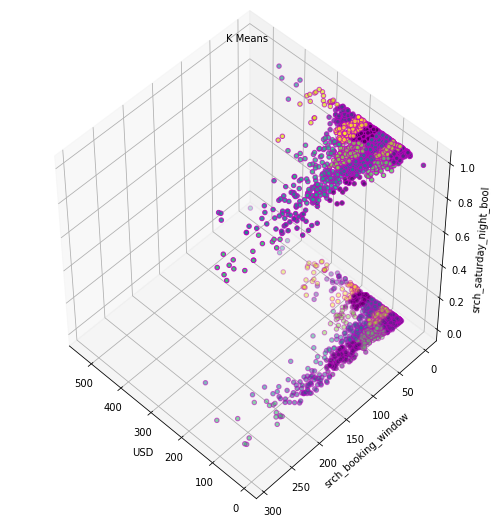

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize = (7, 7))

ax = Axes3D(fig, rect = [0, 0, 0.95, 1], 
            elev = 48, azim = 134)

ax.scatter(X.iloc[:, 0], 
           X.iloc[:, 1], 
           X.iloc[:, 2],
           c = km.labels_.astype(np.float), edgecolor = 'm')

ax.set_xlabel('USD')
ax.set_ylabel('srch_booking_window')
ax.set_zlabel('srch_saturday_night_bool')

plt.title('K Means', fontsize = 10);

## Restricted Boltzman Machines

In [28]:
from sklearn.neural_network import BernoulliRBM
model = BernoulliRBM(n_components=2)
model.fit(data)

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=2, n_iter=10,
             random_state=None, verbose=0)

In [29]:
model.score_samples(X)

array([-0.        , -0.        , -0.        , ..., -2.12678337,
       -2.03283521, -0.        ])

## DB Scan

In [30]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

## Conclusion

K-Means worked extraordinarily well, similarly we had restricted boltzman machines which did a slightly better job than K-Means, but the difference is too minuscle. I also feel that Boltzman Machines are complex, making our model simple should be key so I traded some accuracy for simplicity and ideally one should do that. So, I have plotted graphs of K-Means. I would advise you to not use Boltzman Machines